
## Step 1: Data Exploration & Identification of Relevant Attributes

- Load the dataset and explore its structure.
- Examine the distribution of features.
- Check for missing values or outliers.


In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Wholesale customers data.csv'
data = pd.read_csv(file_path)

In [3]:
# Checking for missing values
print(data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
# Display basic information and first few rows of the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4      

In [5]:
# Descriptive statistics to understand data distribution
print(data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

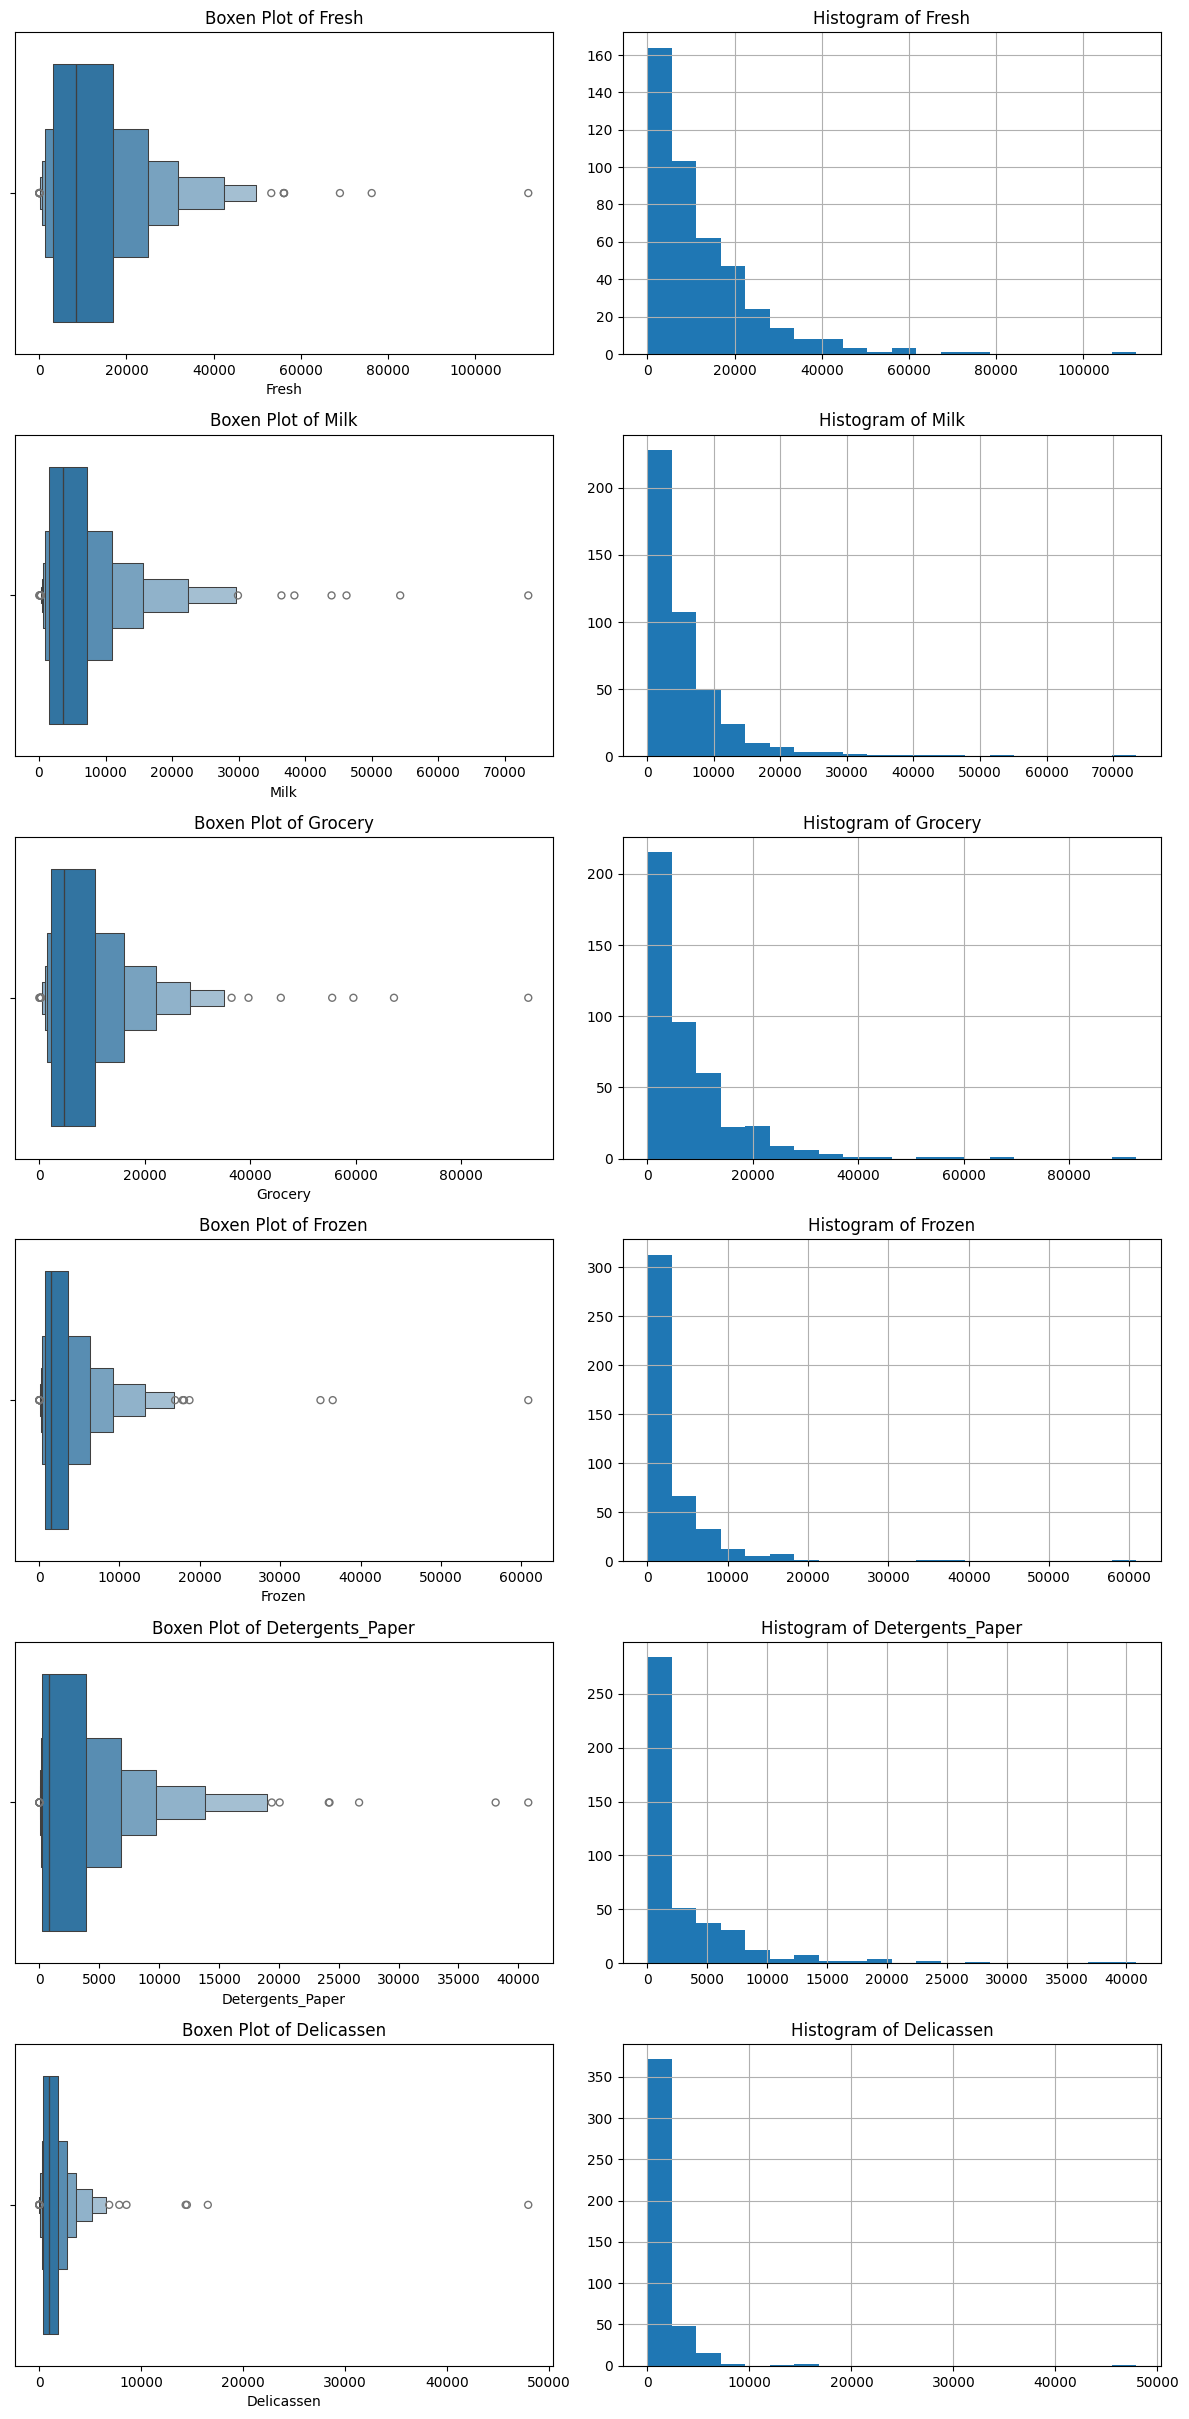

In [6]:
# Visualizing the distribution of each feature using histograms and boxen plots
continuous_features = data.drop(['Channel', 'Region'], axis=1)
num_features = len(continuous_features.columns)

# Calculate the number of rows needed for subplots (2 plots per feature)
num_rows = num_features * 2

plt.figure(figsize=(12, 4 * num_rows))

# Creating boxen plots and histograms in a grid
for i, column in enumerate(continuous_features.columns):
    # Boxen plot
    plt.subplot(num_rows, 2, 2*i + 1)
    sns.boxenplot(x=data[column])
    plt.title(f'Boxen Plot of {column}')

    # Histogram
    plt.subplot(num_rows, 2, 2*i + 2)
    data[column].hist(bins=20)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

### Significant differences in mean and standard deviation across features:

- The dataset reveals that the mean and standard deviation values differ significantly among product categories. For example, the average annual spending on 'Fresh' items is significantly higher than in other categories like as 'Delicassen'. This implies that buyers spend more money on fresh products on average. The large standard deviation in categories such as 'Fresh,' 'Milk,' and 'Grocery', on the other hand, implies a significant variation in spending, implying a diverse client base with varying purchase tendencies.

- The wide range of variation among these categories may indicate the existence of various consumer segments, such as small-scale purchasers versus large-scale distributors. This can be investigated further by using clustering to discover these unique elements.

### Right-Skewed Distribution Signals in Several Categories:

- In numerous categories, including 'Milk,' 'Grocery,' and 'Detergents_Paper,' the mean is significantly higher than the median. This is typical of right-skewed distributions, in which a small percentage of clients spend a lot, pushing the mean up.

- The skewness is caused by the presence of outlier customers, such as large-scale purchases or huge businesses, who are not typical customers. The boxen plots for these categories show extended tails on the higher end, confirming the presence of outliers.


In [7]:
# Creating a summary table for region and channel distribution
region_channel_distribution = pd.crosstab(data['Region'], data['Channel'])
print(region_channel_distribution)

Channel    1    2
Region           
1         59   18
2         28   19
3        211  105


In [8]:
# Creating a summary table to understand the distribution of each category within each region and channel
summary_table = data.groupby(['Channel', 'Region']).agg(
    Count=pd.NamedAgg(column='Channel', aggfunc='size'),
    **{f'Avg_{category}': pd.NamedAgg(column=category, aggfunc='mean') for category in continuous_features.columns}
)

summary_table

Count     Avg_Fresh      Avg_Milk   Avg_Grocery   Avg_Frozen  \
Channel Region                                                                 
1       1          59  12902.254237   3870.203390   4026.135593  3127.322034   
        2          28  11650.535714   2304.250000   4395.500000  5745.035714   
        3         211  13878.052133   3486.981043   3886.734597  3656.900474   
2       1          18   5200.000000  10784.000000  18471.944444  2584.111111   
        2          19   7289.789474   9190.789474  16326.315789  1540.578947   
        3         105   9831.504762  10981.009524  15953.809524  1513.200000   

                Avg_Detergents_Paper  Avg_Delicassen  
Channel Region                                        
1       1                 950.525424     1197.152542  
        2                 482.714286     1105.892857  
        3                 786.682464     1518.284360  
2       1                8225.277778     1871.944444  
        2                8410.263158     1239.000000  
        3                6899.238095     1826.209524

### Significant Differences in Specific Channels:

- When compared to Channel 1, Channel 2 has much higher average spending in 'Grocery' and 'Detergents_Paper' across all regions. For example, in Region 1, the average spending on 'Grocery' is 18,471.94 in Channel 2 against 4,026.14 in Channel 1. This implies that Channel 2, which could represent wholesale or bulk buyers, has a drastically different purchase behavior, focusing on non-perishable commodities.

### Regional Differences in Spending Habits:

- Region 3 has the largest average spending on 'Fresh' products, regardless of channel. This shows a regional preference for fresh products or a larger demand in Region 3. Region 1 in Channel 2 on the other hand, has unusually high spending on 'Detergents_Paper,' indicating special needs or usage patterns in this region-channel combination.

In [9]:
def calculate_outliers(df):
    outlier_mask = pd.DataFrame()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))).sum()
        print(f'Number of outliers in {column}: {outliers}')
        outlier_mask[column] = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
    return outlier_mask

outlier_mask = calculate_outliers(continuous_features)
# Add outlier information to the original DataFrame
data['Outlier'] = outlier_mask.any(axis=1)

Number of outliers in Fresh: 20
Number of outliers in Milk: 28
Number of outliers in Grocery: 24
Number of outliers in Frozen: 43
Number of outliers in Detergents_Paper: 30
Number of outliers in Delicassen: 27


In [10]:
# Identify rows that are not outliers in any column
non_outlier_rows = ~outlier_mask.any(axis=1)

# Filter the original DataFrame to keep only non-outlier rows
data_no_outliers = data[non_outlier_rows]
data_no_outliers.dropna(inplace=True)

C:\Users\sarda\AppData\Local\Temp\ipykernel_2644\1114231096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers.dropna(inplace=True)


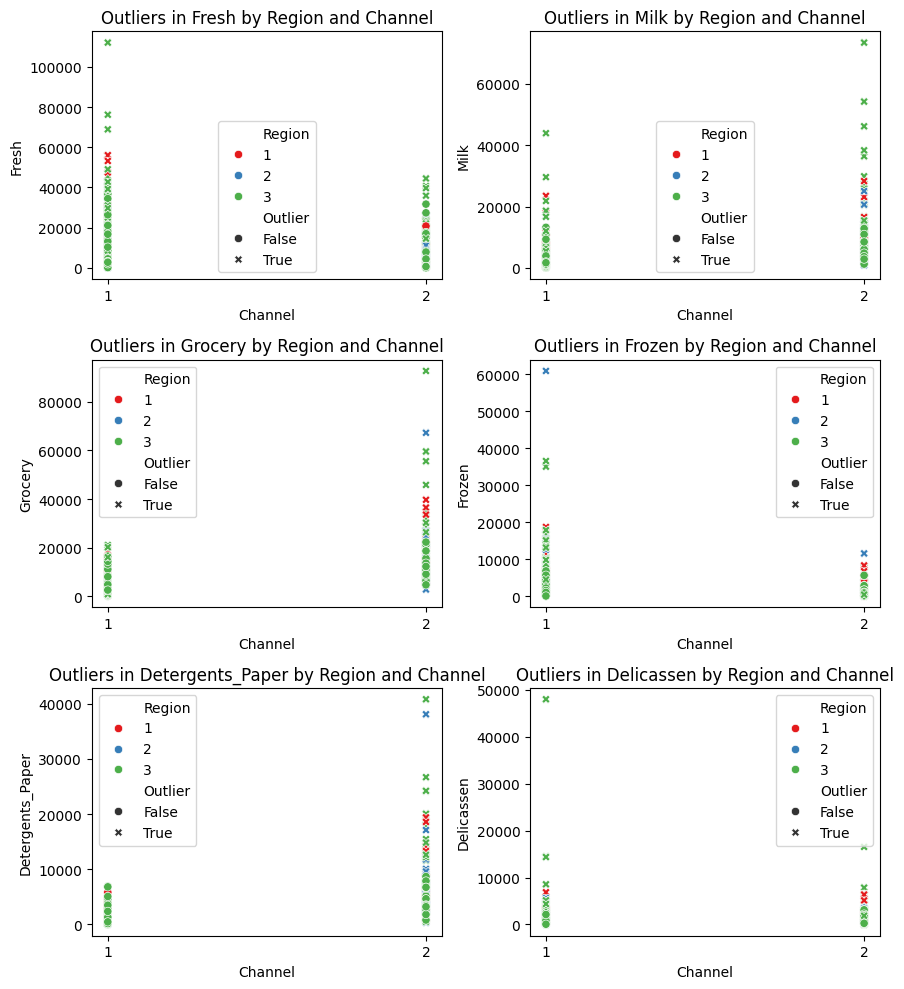

In [11]:
# Plotting scatter plots for each category with region and channel distinction
plt.figure(figsize=(9, 10))
for i, segment in enumerate(continuous_features.columns):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x='Channel', y=segment, hue='Region', data=data,
                    palette='Set1', style='Outlier', markers=["o", "X"])
    plt.title(f'Outliers in {segment} by Region and Channel')
    plt.xlabel('Channel')
    plt.ylabel(segment)
    plt.xticks([1, 2])  # Set x-axis to show only channels 1 and 2

plt.tight_layout()
plt.show()

In [12]:
#data = data_no_outliers
# Removing the 'Outlier' column after plotting
data.drop('Outlier', axis=1, inplace=True)

- Outliers were emphasized in the scatterplots and summary table across multiple product categories, geographies, and channels.

- However, these outliers represent various purchasing habits and market sectors. We have chosen to maintain these data points in order to make informed judgments and build personalized strategies. Most of the outliers come from larger values, potentially a different customer segment which would require a different market strategy.

- Getting rid of them would mean losing vital information about specific client preferences and commercial prospects. As a result, by keeping outliers, we ensure a more complete picture of consumer behavior and market dynamics, allowing for more effective decision-making.

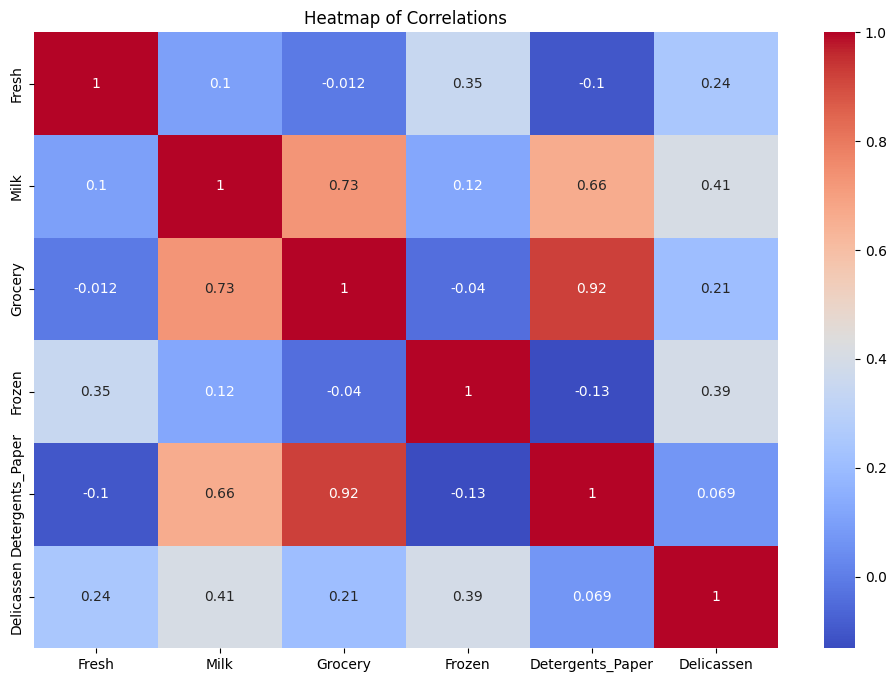

In [13]:
# Heatmap to analyze correlation between continuous features
correlation_matrix = continuous_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

### Correlation Heatmap :

- Household Essentials: Combining the features 'Milk,' 'Grocery,' and 'Detergents_Paper' into a single feature labeled "Household Essentials." This composite feature tries to represent expenditure on basic home requirements since these categories are highly connected and presumably reflect typical purchase behavior.

- Delicatessen: This characteristic should be regarded separately since it represents specialist food products, which may imply a different client category, such as those seeking gourmet or ready-to-eat alternatives.

- Likewise, 'Frozen' should be preserved as a distinct feature. It measures frozen product spending, which might indicate customer preferences for long-lasting food goods or convenience.

- Keeping 'Fresh' as a separate feature, emphasizing expenditure on perishable items and fresh food.

- These groups will be formed after the scaling of the data described below.


# Step 2: Feature Scaling

- Perform feature scaling if necessary to standardize the variables.



- Many features in this dataset are right-skewed, indicating that the distribution has a long tail on the right side. This is common in money or count datasets when a few high values (like major spenders in this case) are substantially larger than the rest.

- The scale and distribution of the data can affect K-means clustering. Data that is skewed can result in clusters dominated by outliers or extreme numbers, thereby misrepresenting the 'average' client.


In [14]:
# Separating the categorical and continuous features
categorical_data = data[['Channel', 'Region']]
continuous_data = data.drop(['Channel', 'Region'], axis=1)

In [15]:
# Apply StandardScaler for feature scaling on continuous features only
scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(continuous_data)
scaled_continuous_data = pd.DataFrame(scaled_continuous, columns=continuous_data.columns)

In [16]:
# Creating the "Household Essentials" composite feature from the scaled data
scaled_continuous_data['Household_Essentials'] = (scaled_continuous_data['Milk'] + scaled_continuous_data['Grocery'] + scaled_continuous_data['Detergents_Paper']) / 3
#Using the average to create the "Household Essentials" composite feature makes sense for understanding customer segments and patterns


In [17]:
# Dropping the original 'Milk', 'Grocery', and 'Detergents_Paper' features
#scaled_continuous_data = scaled_continuous_data.drop(['Milk', 'Grocery', 'Detergents_Paper'], axis=1)

final_df = pd.concat([categorical_data, scaled_continuous_data], axis=1)
final_df.dropna(inplace=True)
final_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Household_Essentials
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.146295
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.267061
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.171204
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.505195
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-0.121223


# Step 3: K-means Clustering

- Experiment with different values of K (number of clusters) and state the number of K of your choice.
- Apply K-means clustering algorithm on the dataset.

In [18]:

from kneed import KneeLocator

# Calculate inertia for a range of k values
inertia = []
k_range = range(1, 11)  # Testing for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_continuous_data)
    inertia.append(kmeans.inertia_)

# Now that we have the inertia values, we can use the KneeLocator to find the elbow point
knee_locator = KneeLocator(
    list(k_range),  # x values (number of clusters)
    inertia,        # y values (inertia)
    curve='convex',
    direction='decreasing'
)

# Optimal number of clusters
optimal_k = knee_locator.elbow-1

# Plotting the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Highlight the elbow point
plt.scatter(optimal_k, inertia[optimal_k-1], color='red', s=100, zorder=5)

# Show the plot
plt.show()

# Print the optimal number of clusters
print('Optimal number of clusters:', optimal_k)

ModuleNotFoundError: No module named 'kneed'

### n_clusters selection

- The above library and implementation for n_cluster selection is quite good but it still wasn't perfect. After analyzing and experimenting the different clusters formed, I chose 3 clusters as it was the most effective in highlighting the customer segments. Initially the optimal number of clusters was 4 which was modified to 3, in order to make the difference in the clusters simpler to understand and to make decisions which will be valid across a larger number of data points.


In [ ]:
# Fit k-means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(final_df)
#Eve

C:\Users\sarda\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Displaying the first few rows with cluster labels
final_df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Household_Essentials,Cluster
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.146295,0
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.267061,0
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.171204,0
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.505195,1
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-0.121223,1


In [ ]:
# Print the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[ 1.9266055 ,  2.57798165, -0.44369228,  0.57109085,  0.81851919,
        -0.33418406,  0.82720846,  0.07531907,  0.7389395 ],
       [ 1.09433962,  2.52830189,  0.10752165, -0.35858663, -0.42710101,
         0.08274263, -0.4293461 , -0.11805076, -0.40501124],
       [ 1.84615385,  2.61538462,  1.09004412,  3.98320348,  3.58457916,
         0.77799282,  3.56664129,  2.25618179,  3.71147464]])

In [ ]:
clusters = final_df['Cluster']
# Generating a statistical summary for each cluster
for i in range(optimal_k):
    cluster_data = final_df[final_df['Cluster'] == i]
    summary = cluster_data.describe()
    print(f"Cluster {i} Summary:\n{summary}\n")

Cluster 0 Summary:
          Channel      Region       Fresh        Milk     Grocery      Frozen  \
count  109.000000  109.000000  109.000000  109.000000  109.000000  109.000000   
mean     1.926606    2.577982   -0.443692    0.571091    0.818519   -0.334184   
std      0.261987    0.736528    0.535320    0.659891    0.668602    0.301450   
min      1.000000    1.000000   -0.948496   -0.614525   -0.196187   -0.628343   
25%      2.000000    2.000000   -0.832846    0.125439    0.311485   -0.543380   
50%      2.000000    3.000000   -0.597192    0.466053    0.619206   -0.428721   
75%      2.000000    3.000000   -0.206151    0.871371    1.253189   -0.237553   
max      2.000000    3.000000    1.560499    2.721890    3.006073    1.460681   

       Detergents_Paper  Delicassen  Household_Essentials  Cluster  
count        109.000000  109.000000            109.000000    109.0  
mean           0.827208    0.075319              0.738940      0.0  
std            0.694603    0.687889         

# Step 4: Analysis and Interpretation

- Analyze and interpret the characteristics of each cluster in business language.


In [ ]:
data['Cluster'] = clusters

I decided to use Fresh and Grocery as the two characteristics for cluster visualization as they had the least amount of correlation (in magnitude) as per the heat map, which might provide intriguing patterns and a distinct breakup of clusters.

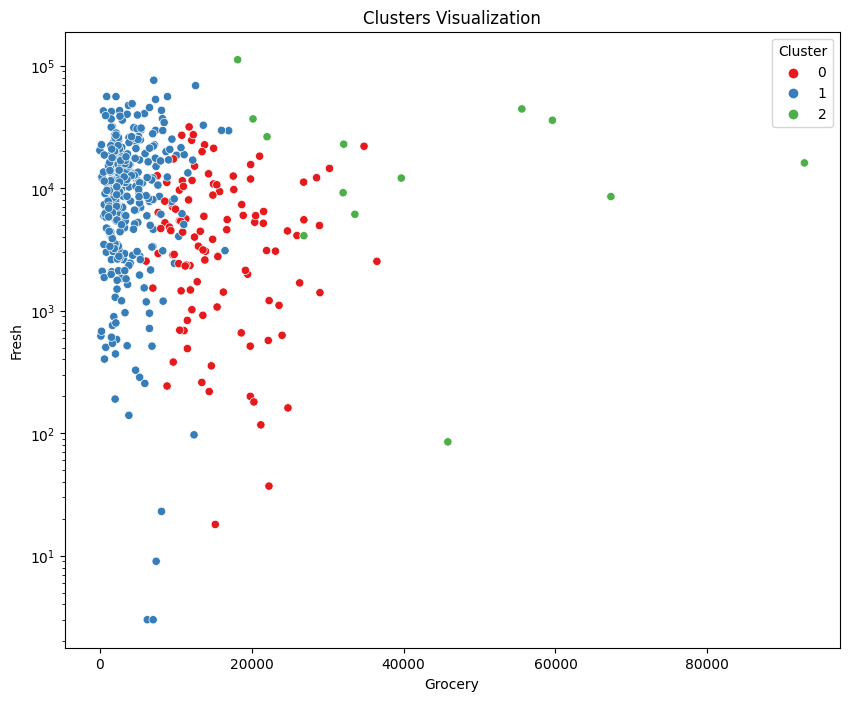

In [ ]:
# Visualizing the clusterss
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='Grocery', y='Fresh', hue='Cluster', data=data, palette='Set1')

#Set the scale of the axes to logarithmic for better visualization
#scatter_plot.set(xscale="log",yscale="log")
scatter_plot.set(yscale="log")
#scatter_plot.set(xscale="log")
plt.title('Clusters Visualization')
plt.show()

Let us also look at the visualization for the highest correlation features.

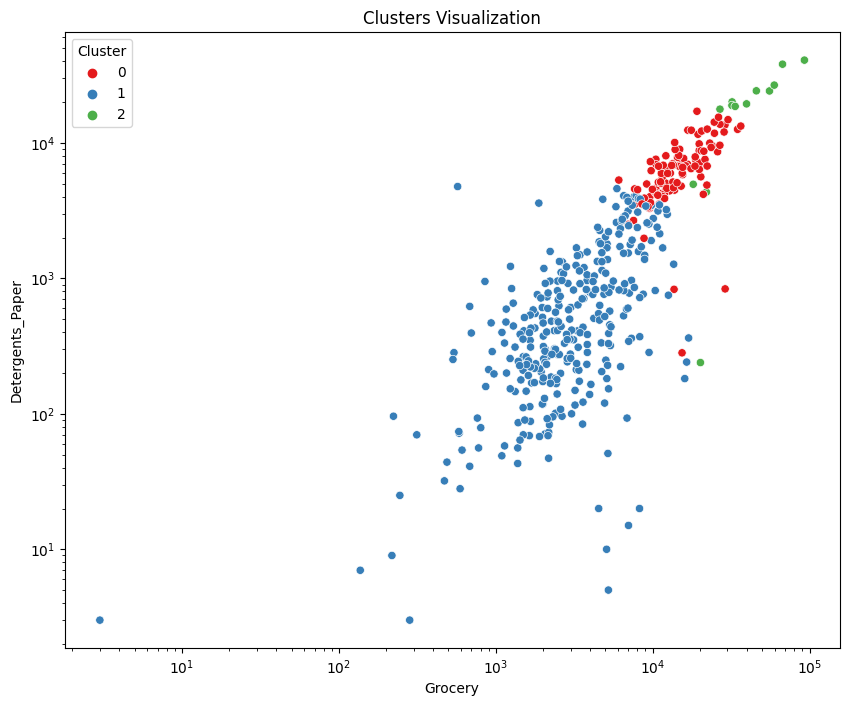

In [ ]:
# Visualizing the clusterss
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='Grocery', y='Detergents_Paper', hue='Cluster', data=data, palette='Set1')

#Set the scale of the axes to logarithmic for better visualization
scatter_plot.set(xscale="log",yscale="log")
#scatter_plot.set(yscale="log")
#scatter_plot.set(xscale="log")
plt.title('Clusters Visualization')
plt.show()

Both the visuals show some clear patterns in the clustering, let us analyse further using tables.

In [ ]:
# Calculate the mean values for each cluster
cluster_means = data.groupby('Cluster').mean()

# Print the mean values to interpret cluster characteristics
cluster_means


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.926606,2.577982,6395.155963,10006.339450,15720.954128,1451.422018,6821.018349,1737.036697
1,1.094340,2.528302,13358.613208,3152.770440,3897.081761,3473.163522,836.761006,1192.333333
2,1.846154,2.615385,25770.769231,35160.384615,41977.384615,6844.538462,19867.384615,7880.307692


In [ ]:
# Creating a summary table to understand the distribution of each cluster within each region and channel
summary_table = data.groupby(['Cluster','Channel','Region']).agg(
    Count=pd.NamedAgg(column='Channel', aggfunc='size'),
    **{f'Avg_{category}': pd.NamedAgg(column=category, aggfunc='mean') for category in continuous_features.columns}
)

#summary_table.to_csv('summary_table.csv')
summary_table

Count     Avg_Fresh      Avg_Milk   Avg_Grocery  \
Cluster Channel Region                                                    
0       1       1           3   4703.666667  13931.666667  13294.333333   
                3           5   9451.600000   9254.000000  14900.600000   
        2       1          13   3131.000000   9862.769231  18394.076923   
                2          14   5785.142857  11241.285714  15827.071429   
                3          74   6946.054054   9689.621622  15385.081081   
1       1       1          56  13341.464286   3331.196429   3529.625000   
                2          28  11650.535714   2304.250000   4395.500000   
                3         204  13392.220588   3019.147059   3467.058824   
        2       1           3  11548.000000   4812.333333   6697.333333   
                2           4  12237.250000   3066.750000   5330.750000   
                3          23  15612.869565   4735.000000   7384.521739   
2       1       3           2  74499.000000  36788.500000  19159.000000   
        2       1           2   9126.500000  25729.500000  36640.000000   
                2           1   8565.000000   4980.000000  67298.000000   
                3           8  19900.500000  40883.625000  45851.250000   

                          Avg_Frozen  Avg_Detergents_Paper  Avg_Delicassen  
Cluster Channel Region                                                      
0       1       1        3873.333333           3608.333333     2087.666667  
                3        2523.400000           4651.800000     4607.000000  
        2       1        1487.692308           8133.846154     1588.769231  
                2        1063.214286           8055.642857     1146.428571  
                3        1347.878378           6633.621622     1666.689189  
1       1       1        3087.357143            808.142857     1149.446429  
                2        5745.035714            482.714286     1105.892857  
                3        3459.362745            674.235294     1180.539216  
        2       1        5230.666667           1437.000000     1683.333333  
                2        3563.750000           2228.500000     1569.000000  
                3        1524.173913           2458.652174     1377.043478  
2       1       3       26639.500000           2593.500000    28246.500000  
        2       1        5741.000000          19002.000000     3995.500000  
                2         131.000000          38102.000000     1215.000000  
                3        3010.875000          22122.875000     4593.125000

C:\Users\sarda\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


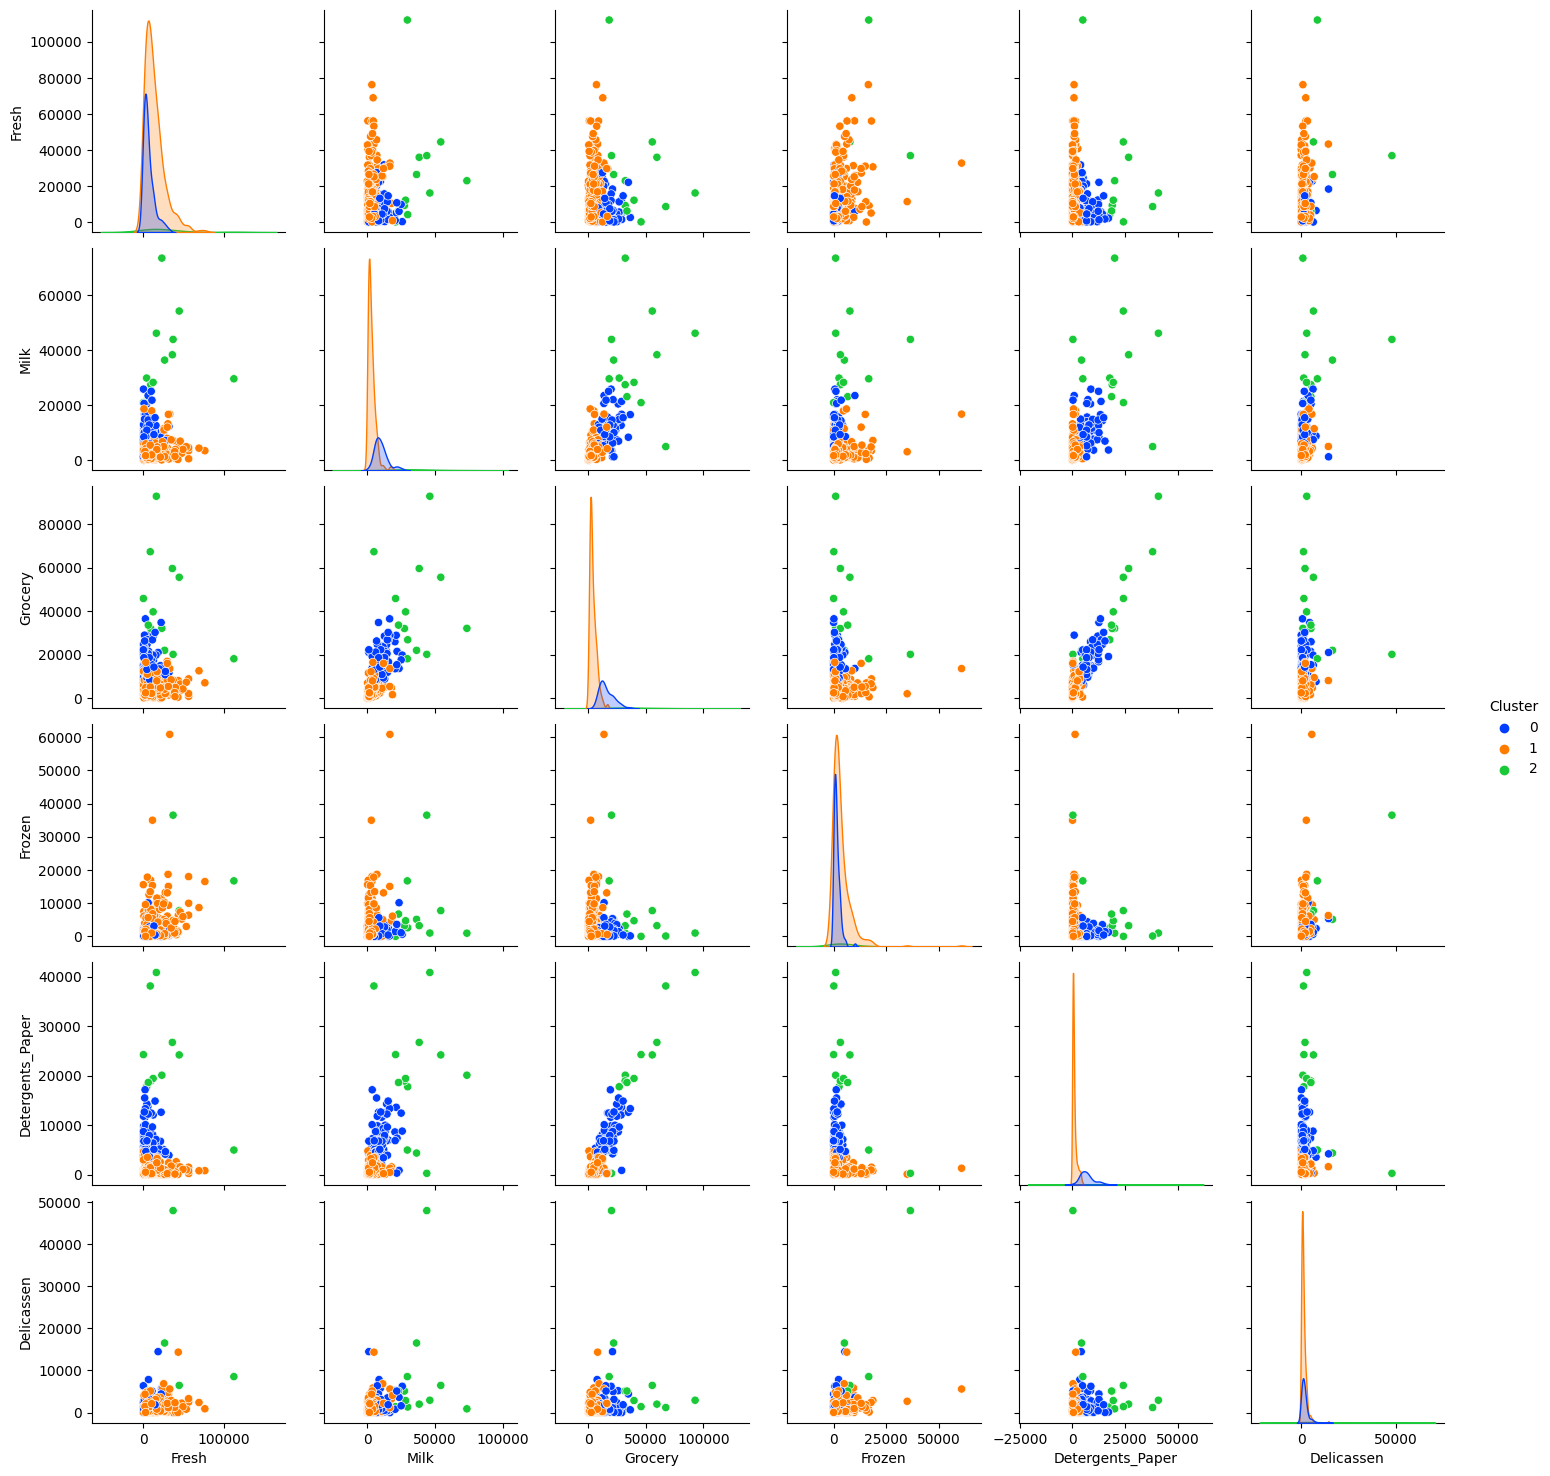

In [ ]:
# Pair plot to quickly understand the distribution of each cluster across the features
pair_plot = sns.pairplot(data[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen', 'Cluster']], hue='Cluster', palette='bright')
plt.show()

In [ ]:
data.shape

(440, 9)

## Cluster Analysis

### Cluster 0 - "Mixed Essential Goods" (Red Points)
- **Channels & Regions**: Channels 1 & 2 across all regions - *Mixed (Retail and Wholesale) Channel*
- **Characteristics**: High spending on milk, grocery, and detergents/paper.
- **Insight**: Probably supermarkets or a variety of retail establishments with a broad selection of daily necessities.

### Cluster 1 - "Selective Fresh and Frozen Retail" (Blue Points)
- **Channels & Regions**: Main Channel 1 in all regions. - *Retail Channel*
- **Characteristics**: Focus on perishable items, especially fresh and frozen goods. The customers have lower spend across both fresh produce and grocery.
- **Insight**: Could be specialty stores or local markets with a focus on quality and possibly organic products.

### Cluster 2 - "High-Volume Wholesale Leaders" (Green Points)
- **Channels & Regions**: Mostly Channel 2 in all regions. - *Wholesale Channel*
- **Characteristics**: Very high spending on specific categories like milk and detergents/paper.
- **Insight**: Might represent major players in the hospitality industry, requiring large quantities of specific supplies (HORECA).

---

### Overall Observations and Strategic Recommendations:

- **Cluster 0**: Develop region-specific strategies to cater to the versatile product demands of retail businesses. Consider loyalty programs and volume discounts to enhance retention and increase purchase sizes.

- **Cluster 1**: For these retailers, marketing support emphasizing the freshness and quality of produce can drive traffic. Inventory management solutions might be an attractive value-added service to offer. Also Cluster 1’s lower spending suggests that these businesses may benefit from strategies that help manage inventory turnover and reduce waste, like just-in-time ordering.

- **Cluster 2**: Engage with large-scale buyers by optimizing the supply chain for bulk orders and providing competitive pricing. Explore long-term contracts and partnerships for a steady business relationship.